In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls "drive/MyDrive/COVID - Trends Data"

2020_country_weekly_2020_US_weekly_symptoms_dataset.csv
2020_sub_region_1_weekly_2020_US_California_weekly_symptoms_dataset.csv
2020_sub_region_1_weekly_2020_US_Florida_weekly_symptoms_dataset.csv
2020_sub_region_1_weekly_2020_US_Georgia_weekly_symptoms_dataset.csv
2020_sub_region_1_weekly_2020_US_Massachusetts_weekly_symptoms_dataset.csv
2020_sub_region_1_weekly_2020_US_New_York_weekly_symptoms_dataset.csv
2020_sub_region_1_weekly_2020_US_Texas_weekly_symptoms_dataset.csv
2021_country_weekly_2021_US_weekly_symptoms_dataset.csv
2021_sub_region_1_weekly_2021_US_California_weekly_symptoms_dataset.csv
2021_sub_region_1_weekly_2021_US_Florida_weekly_symptoms_dataset.csv
2021_sub_region_1_weekly_2021_US_Georgia_weekly_symptoms_dataset.csv
2021_sub_region_1_weekly_2021_US_Massachusetts_weekly_symptoms_dataset.csv
2021_sub_region_1_weekly_2021_US_New_York_weekly_symptoms_dataset.csv
2021_sub_region_1_weekly_2021_US_Texas_weekly_symptoms_dataset.csv
2022_country_weekly_2022_US_weekly_symptoms_

In [3]:
import numpy as np 
import pandas as pd

In [4]:
us_2020_data = pd.read_csv("drive/MyDrive/COVID - Trends Data/2020_country_weekly_2020_US_weekly_symptoms_dataset.csv")
us_2021_data = pd.read_csv("drive/MyDrive/COVID - Trends Data/2021_country_weekly_2021_US_weekly_symptoms_dataset.csv")
us_2022_data = pd.read_csv("drive/MyDrive/COVID - Trends Data/2022_country_weekly_2022_US_weekly_symptoms_dataset.csv")

us_covid_symptom_data = pd.concat([us_2020_data, us_2021_data, us_2022_data], ignore_index=True)
us_covid_symptom_data.head()

,country_region_code,country_region,sub_region_1,sub_region_1_code,sub_region_2,sub_region_2_code,place_id,date,symptom:Abdominal obesity,symptom:Abdominal pain,...,symptom:Wart,symptom:Water retention,symptom:Weakness,symptom:Weight gain,symptom:Wheeze,symptom:Xeroderma,symptom:Xerostomia,symptom:Yawn,symptom:hyperhidrosis,symptom:pancreatitis
0,US,United States,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-01-06,3.00,5.67,...,1.69,0.33,0.49,4.29,0.39,3.30,0.52,0.22,0.66,0.47
1,US,United States,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-01-13,2.93,5.59,...,1.67,0.34,0.52,4.20,0.37,3.12,0.51,0.22,0.66,0.47
2,US,United States,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-01-20,2.92,5.69,...,1.66,0.34,0.51,4.27,0.38,3.53,0.54,0.22,0.67,0.47
3,US,United States,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-01-27,2.77,5.61,...,1.65,0.34,0.52,4.14,0.39,3.12,0.53,0.21,0.67,0.45
4,US,United States,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-03,2.91,5.64,...,1.60,0.35,0.53,4.19,0.40,3.25,0.53,0.22,0.68,0.45


In [5]:
for column in us_covid_symptom_data.columns:
  if column.startswith('symptom'):
    print (column.split('symptom:', 1)[1])

symptoms_considered = ['Acute bronchitis', 
                       'Asphyxia', 
                       'Asthma', 
                       'Common cold', 
                       'Chills', 
                       'Cough', 
                       'Fever', 
                       'Hypoxia', 
                       'Nasal congestion', 
                       'Shallow breathing', 
                       'Shivering', 
                       'Shortness of breath', 
                       'Sore throat', 
                       'Stroke', 
                       'Throat irritation', 
                       'Wheeze' ]

symptoms_considered

Abdominal obesity
Abdominal pain
Acne
Actinic keratosis
Acute bronchitis
Adrenal crisis
Ageusia
Alcoholism
Allergic conjunctivitis
Allergy
Amblyopia
Amenorrhea
Amnesia
Anal fissure
Anaphylaxis
Anemia
Angina pectoris
Angioedema
Angular cheilitis
Anosmia
Anxiety
Aphasia
Aphonia
Apnea
Arthralgia
Arthritis
Ascites
Asperger syndrome
Asphyxia
Asthma
Astigmatism
Ataxia
Atheroma
Attention deficit hyperactivity disorder
Auditory hallucination
Autoimmune disease
Avoidant personality disorder
Back pain
Bacterial vaginosis
Balance disorder
Beau's lines
Bell's palsy
Biliary colic
Binge eating
Bleeding
Bleeding on probing
Blepharospasm
Bloating
Blood in stool
Blurred vision
Blushing
Boil
Bone fracture
Bone tumor
Bowel obstruction
Bradycardia
Braxton Hicks contractions
Breakthrough bleeding
Breast pain
Bronchitis
Bruise
Bruxism
Bunion
Burn
Burning Chest Pain
Burning mouth syndrome
Candidiasis
Canker sore
Cardiac arrest
Carpal tunnel syndrome
Cataplexy
Cataract
Chancre
Cheilitis
Chest pain
Chills
Chor

['Acute bronchitis',
 'Asphyxia',
 'Asthma',
 'Common cold',
 'Chills',
 'Cough',
 'Fever',
 'Hypoxia',
 'Nasal congestion',
 'Shallow breathing',
 'Shivering',
 'Shortness of breath',
 'Sore throat',
 'Stroke',
 'Throat irritation',
 'Wheeze']

In [6]:
california_covid_symptom_data = us_covid_symptom_data[us_covid_symptom_data['sub_region_1'] == 'California']
texas_covid_symptom_data = us_covid_symptom_data[us_covid_symptom_data['sub_region_1'] == 'Texas']
florida_covid_symptom_data = us_covid_symptom_data[us_covid_symptom_data['sub_region_1'] == 'Florida']
georgia_covid_symptom_data = us_covid_symptom_data[us_covid_symptom_data['sub_region_1'] == 'Georgia']
nyc_covid_symptom_data = us_covid_symptom_data[us_covid_symptom_data['sub_region_1'] == 'New York']
massachusets_covid_symptom_data = us_covid_symptom_data[us_covid_symptom_data['sub_region_1'] == 'Massachusetts']

In [25]:
georgia_covid_fever_cough_data = georgia_covid_symptom_data[['symptom:Fever', 'symptom:Cough']]

In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
from torch.nn import Parameter
from torch.nn.init import xavier_uniform_
import pandas as pd

In [30]:
georgia_covid_fever_cough_data.shape

(144, 2)

In [32]:
georgia_covid_fever_cough_npy = georgia_covid_fever_cough_data[['symptom:Fever', 'symptom:Cough']].to_numpy()
georgia_covid_fever_cough_npy = georgia_covid_fever_cough_npy.T

georgia_covid_fever_cough_npy.shape

(2, 144)

In [34]:
# Chunk it into sequences
nchunks = 9
chunksize = int(georgia_covid_fever_cough_npy.shape[1] / nchunks)
chunked=[georgia_covid_fever_cough_npy[:,chunksize*i:chunksize*(i+1)] for i in range(nchunks)]
data = torch.tensor(np.array(chunked)).float()#.cuda() when on GPU

In [35]:
# Lets have a look at the shape
print("Number of samples: ",data.shape[0])
print("Number of channels: ",data.shape[1])
print("Length of time sequence: ",data.shape[2])

Number of samples:  9
Number of channels:  2
Length of time sequence:  16


In [36]:
mask = torch.ones_like(data).float()
delta = torch.ones_like(data).float()
delta[:,:,0] = 0

In [37]:
# Make a ground truth copy
ground_truth = data.detach().clone()
# remove 5% of the data
np.random.seed(5)
ix = [(row,channel, step) for row in range(data.shape[0]) for channel in range(data.shape[1]) for step in range(data.shape[2])]
np.random.shuffle(ix)
to_replace = int(round(.05*len(ix)))
ix = ix[:to_replace]

for idx in ix:
    data[idx[0],idx[1],idx[2]] = np.nan
    mask[idx[0],idx[1],idx[2]] = 0

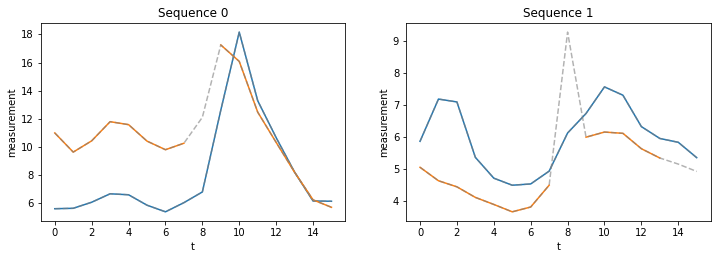

In [41]:
# Plot some sequences
plt.figure(figsize=(12,8))
for pl in range(2):
    plt.subplot(221+pl)
    plt.title("Sequence {}".format(pl))
    plt.xlabel("t")
    plt.ylabel("measurement")
    for dim in range(2):
        plt.plot(np.arange(16),data[pl,dim,:].cpu())
        plt.plot(np.arange(16),ground_truth[pl,dim,:].cpu(),c="grey",linestyle="dashed",alpha=0.6)

  mRNN

In [42]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

from IPython.display import clear_output
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
import torch
import numpy as np

def live_plot(data,missing,ground_truth,figsize=(12,4), title=''):
    clear_output(wait=True)
    plt.figure(figsize=figsize)
    plt.ylim(-1.5,3.5)
    plt.xlim(-2,51)
    missing=missing.cpu()
    x= np.arange(data.shape[1])
    colors=["blue","green","red"]
    for dim in range(data.shape[0]):
        plt.plot(x,data[dim].cpu(),c=colors[dim])
        plt.plot(x,ground_truth[dim].cpu(),alpha=0.5,linestyle="dashed",c=colors[dim])
        plt.scatter(x[missing[dim]],(data[dim][missing[dim]]).cpu(),c=colors[dim])

    line = Line2D([], [], label='ground truth', color='blue', linestyle="dashed")
    line2 = Line2D([], [], label='reconstruction', color='blue')
    line3 = Line2D([], [], label='missing points', color='blue',marker="o")
    
    plt.legend(handles=[line,line2,line3], numpoints=1,loc=3)
    plt.title("Epoch {}".format(int(title)+1))
#     plt.grid(True)
    plt.xlabel('axis x')
    plt.ylabel('axis y')
    plt.show()
    
def split_data(data, mask, delta):
    indices = np.arange(data.shape[0])
    np.random.shuffle(indices)
    train_indices= indices[:int(data.shape[0]*0.8)]
    test_indices = indices[int(data.shape[0]*0.8):]

    data_train = data[train_indices]
    mask_train = mask[train_indices]
    delta_train = delta[train_indices]
    data_test = data[test_indices]
    mask_test = mask[test_indices]
    delta_test = delta[test_indices]
    return data_train,mask_train,delta_train,data_test,mask_test,delta_test

def permute2st(v, ndim_en=1):
    """
    Permute last ndim_en of an array v to the first
    :type v: torch.Tensor
    :type ndim_en: int
    :rtype: torch.Tensor
    """
    nd = v.ndimension()
    return v.permute([*range(-ndim_en, 0)] + [*range(nd - ndim_en)])

def permute2en(v, ndim_st=1):
    """
    Permute first ndim_en of an array v to the last
    :type v: torch.Tensor
    :type ndim_st: int
    :rtype: torch.Tensor
    """
    nd = v.ndimension()
    return v.permute([*range(ndim_st, nd)] + [*range(ndim_st)])

def unblock_diag(m, n=None, size_block=None):
    """
    The inverse of block_diag(). Not vectorized yet.
    :param m: block diagonal matrix
    :param n: int. Number of blocks
    :size_block: torch.Size. Size of a block.
    :return: tensor unblocked such that the last sizes are [n] + size_block
    """
    # not vectorized yet
    if size_block is None:
        size_block = torch.Size(torch.tensor(m.shape[-2:]) // n)
    elif n is None:
        n = m.shape[-2] // torch.tensor(size_block[0])
        assert n == m.shape[-1] // torch.tensor(size_block[1])
        
    m = permute2st(m, 2)

    res = torch.zeros(torch.Size([n]) + size_block + m.shape[2:])
    for i_block in range(n):
        st_row = size_block[0] * i_block
        en_row = size_block[0] * (i_block + 1)
        st_col = size_block[1] * i_block
        en_col = size_block[1] * (i_block + 1)
        res[i_block,:] = m[st_row:en_row, st_col:en_col, :]

    return permute2en(res, 3)

def block_diag(m):
    """
    Make a block diagonal matrix along dim=-3
    EXAMPLE:
    block_diag(torch.ones(4,3,2))
    should give a 12 x 8 matrix with blocks of 3 x 2 ones.
    Prepend batch dimensions if needed.
    You can also give a list of matrices.
    :type m: torch.Tensor, list
    :rtype: torch.Tensor
    """
    if type(m) is list:
        m = torch.cat([m1.unsqueeze(-3) for m1 in m], -3)

    d = m.dim()
    n = m.shape[-3]
    siz0 = m.shape[:-3]
    siz1 = m.shape[-2:]
    m2 = m.unsqueeze(-2)
    eye = attach_dim(torch.eye(n).unsqueeze(-2), d - 3, 1)
    return (m2 * eye).reshape(
        siz0 + torch.Size(torch.tensor(siz1) * n)
    )

def attach_dim(v, n_dim_to_prepend=0, n_dim_to_append=0):
    return v.reshape(
        torch.Size([1] * n_dim_to_prepend)
        + v.shape
        + torch.Size([1] * n_dim_to_append))

def ReLU(x):
    return x * (x > 0)

def lin_interpolation(x_in):
    x = x_in.clone()
    for sample in range(x.shape[0]): # for every sample
        for stream in range(x.shape[1]): # for every stream
            s = pd.Series(x[sample,stream])
            s = s.interpolate().bfill().ffill() # linear interpolation, then backward and forward fill for first and last value
            x[sample,stream] = torch.tensor(s.values) # replace in original tensor
    return x

In [43]:
class imputer(nn.Module):
    '''Fully connected network that computes the imputation across data streams. We can use the time dimension
    as the batch dimension here, as the linear layers are independent of time.'''
    def __init__(self,n_channels,hidden_dim=3,act='relu'):
        super(imputer, self).__init__()
        if act == 'relu':
            self.act = F.relu
        elif act == 'tanh':
            self.act = F.tanh
        self.V1 = nn.Linear(n_channels,hidden_dim,bias=False)
        self.V2 = nn.Linear(n_channels,hidden_dim,bias=False)
        self.U = nn.Linear(n_channels,hidden_dim) # bias beta
        self.W = nn.Linear(hidden_dim,n_channels) # bias alpha
        
    def forward(self,x,x_est,m):
        '''x : true measurement
        x_est : estimated measurement of the interpolater
        m : mask'''
        v1out = self.V1(x_est.permute(0,2,1))
        v2out = self.V2(m.permute(0,2,1))
        self.U.weight.data.fill_diagonal_(0) # diagonal to zero to prevent usage of x_t^d at for prediction x_hat_t^d
        uout = self.U(x.permute(0,2,1)) 
        h = self.act(uout+v1out+v2out) # hidden layer
        out = self.W(h) # output layer, linear activation here
        return out.permute(0,2,1)

In [44]:
class interpolater(nn.Module):
    '''Interpolater Module for the M-RNN model.'''
    def __init__(self,nchannels,hidden_dim,seq_len,padding="replication",act='relu'):
        super(interpolater, self).__init__()
        self.nchannels = nchannels
        self.hidden_dim = hidden_dim
        self.seq_len = seq_len
        
        # Activation function
        if act == 'relu':
            self.act = F.relu
        elif act == 'tanh':
            self.act = F.tanh
        
        # Forward RNN weights
        self.Wf = Parameter(block_diag(xavier_uniform_(torch.FloatTensor(nchannels,hidden_dim,hidden_dim).to(device=device))))
        self.Vf = Parameter(block_diag(xavier_uniform_(torch.FloatTensor(nchannels,hidden_dim,3).to(device=device))))
        self.cf = Parameter(block_diag(xavier_uniform_(torch.FloatTensor(nchannels,hidden_dim,1).to(device=device))))

        # Backward RNN weights
        self.Wb = Parameter(block_diag(xavier_uniform_(torch.FloatTensor(nchannels,hidden_dim,hidden_dim).to(device=device))))
        self.Vb = Parameter(block_diag(xavier_uniform_(torch.FloatTensor(nchannels,hidden_dim,3).to(device=device))))
        self.cb = Parameter(block_diag(xavier_uniform_(torch.FloatTensor(nchannels,hidden_dim,1).to(device=device))))

        # Hidden state weights (combine forward and backward)
        self.U = Parameter(block_diag(xavier_uniform_(torch.FloatTensor(nchannels,1,hidden_dim*2).to(device=device))))
        self.c0 = Parameter(block_diag(nn.init.normal_(torch.FloatTensor(nchannels,1,1),std=.1).to(device=device)))
        
        # Padding options
        if padding == "replication":
            self.pad = nn.ReplicationPad2d((1,1,0,0))
        elif padding == "zero":
            self.pad = nn.ZeroPad2d((1,1,0,0))
            
    def forward(self,x,m,d):
        '''A forward pass through the interpolater. This function will go through all time steps.
        Input:
        x = Measurement
        m = Mask (1=observed, 0=missing)
        d = time elapsed since last observation
        
        Output:
        Estimate x_est for every input time step.'''
        
        batchsize = x.shape[0]
        # Initialize hidden states
        hidden_forwards = [torch.zeros(batchsize,self.hidden_dim*self.nchannels,self.nchannels)]
        hidden_backwards = [torch.zeros(batchsize,self.hidden_dim*self.nchannels,self.nchannels)]
        
        # Append zeros to beginning and end of input
        x = self.pad(x.unsqueeze(0)).squeeze(0)
        m = self.pad(m.unsqueeze(0)).squeeze(0)
        d = self.pad(d.unsqueeze(0)).squeeze(0)
        
        # Iterate through time (backward and forward)
        for t in range(self.seq_len):  
            # forward RNN hidden states
            hidden_f = self.act(torch.matmul(self.Wf,hidden_forwards[t]) + torch.matmul(self.Vf,
                block_diag(torch.stack((x[:,:,t],m[:,:,t],d[:,:,t]),axis=2).view(-1,self.nchannels,3,1))) 
                +self.cf)
            
            # backward RNN hidden states
            hidden_b = self.act(torch.matmul(self.Wb,hidden_backwards[t]) + 
                  torch.matmul(self.Vb,block_diag(torch.stack((x[:,:,self.seq_len+1-t],m[:,:,self.seq_len+1-t],
                  d[:,:,self.seq_len+1-t]),axis=2).view(-1,self.nchannels,3,1))) 
                  + self.cb)
            
            hidden_forwards.append(hidden_f)
            hidden_backwards.append(hidden_b)

        hidden_forwards = hidden_forwards[1:] # delete state t=-1
        hidden_backwards = hidden_backwards[1:][::-1] # delete state t=T+1 and reverse the list
        
        final_hidden=torch.empty(batchsize,self.nchannels,self.seq_len)
        
        # Iterate through time again and compute combined state
        for t in range(self.seq_len):
            hidden = self.act(torch.matmul(self.U,block_diag(torch.cat((
                unblock_diag(hidden_forwards[t],n=self.nchannels,size_block=(self.hidden_dim,1)),
                unblock_diag(hidden_backwards[t],n=self.nchannels,size_block=(self.hidden_dim,1))),axis=2))) 
                + self.c0)
            
            final_hidden[:,:,t]= unblock_diag(hidden,n=self.nchannels).flatten(1)
            
        return final_hidden

In [45]:
class MRNN(nn.Module):
    def __init__(self,nchannels,seq_len,hidden_dim_inter,hidden_dim_imp=3,verbose=False,padding="replication",act='relu'):
        super(MRNN, self).__init__()
        self.inter = interpolater(nchannels,hidden_dim_inter,seq_len,padding=padding,act=act)
        self.imp = imputer(nchannels,hidden_dim_imp,act=act)
        self.verbose = verbose
        
    def forward(self,x,m,d):
        '''x = measurements, m = mask, d = time delta between measurements'''
        out = self.inter.forward(x,m,d)
        out = self.imp.forward(x,out,m)
        return out
    
    def fit(self,epochs,optimizer,loss_func,batch_size,x,m,d):
        loss_hist = []
        # Make initial interpolation
        x = lin_interpolation(x)

        # Iterate over epochs
        pbar = tqdm(range(epochs))
        for i in pbar:   
            # shuffle dataset
            indices = torch.randperm(x.shape[0])
            x = x[indices]
            m = m[indices]
            d = d[indices]
            
            temp_loss_hist=[]
            # Iterate over all batches
            for batch in range(int(x.shape[0] / batch_size)):
                x_b = x[batch*batch_size:(batch+1)*batch_size]
                m_b = m[batch*batch_size:(batch+1)*batch_size]
                d_b = d[batch*batch_size:(batch+1)*batch_size]
                # Estimate all values (forward pass)
                output = self.forward(x_b,m_b,d_b)
                # Compute loss
                loss = loss_func(m_b*output,m_b*x_b) # only use loss of actually observed measurements
                # Backward the loss
                optimizer.zero_grad()
                loss.backward()
                temp_loss_hist.append(loss)
                # Update the weights
                optimizer.step()
            if self.verbose:
                # print graph
                x_hat = self.predict(x,m,d)
                missing = (m!=1)
                live_plot(x_hat[0],missing[0],x[0],title=i)
                
            loss_hist.append(torch.stack(temp_loss_hist).mean())
            pbar.set_postfix({'loss': torch.stack(temp_loss_hist).mean()})
             
        return loss_hist
    
    def predict(self,x,m,d,replace=False):
        with torch.no_grad():
            # initial interpolation
            x = lin_interpolation(x)
            # Forward dataset
            out = self.forward(x,m,d)
            if replace:
                observed = (m==1)
                out[observed] = x[observed]
                
        return out        

In [46]:
if torch.cuda.is_available():
    device = torch.device('cuda')
    torch.set_default_tensor_type('torch.cuda.FloatTensor')
else:
    device = torch.device('cpu')
    torch.set_default_tensor_type('torch.FloatTensor')

In [57]:
georgia_model = MRNN(2,16,9,9,verbose=False,padding="replication").to(device=device)
optimizer = torch.optim.Adam(georgia_model.parameters(),lr=0.005)
loss_func = nn.MSELoss()
epochs = 50

In [59]:
# Fit the model
losses = georgia_model.fit(epochs,optimizer,loss_func,4,data,mask,delta)

  0%|          | 0/50 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:79: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').


Text(0.5, 0, 'Epochs')

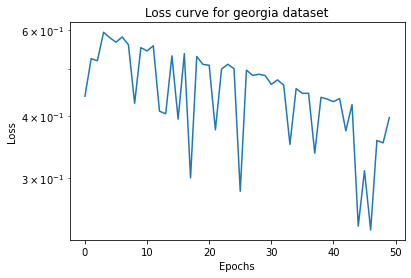

In [68]:
plt.plot(np.arange(len(losses)),np.array([loss.detach().numpy() for loss in losses]))
plt.yscale("log")
plt.title("Loss curve for georgia dataset")
plt.ylabel("Loss")
plt.xlabel("Epochs")

In [70]:
rec = georgia_model.predict(data,mask,delta,replace=True)
print (rec.shape)

torch.Size([9, 2, 16])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:79: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').


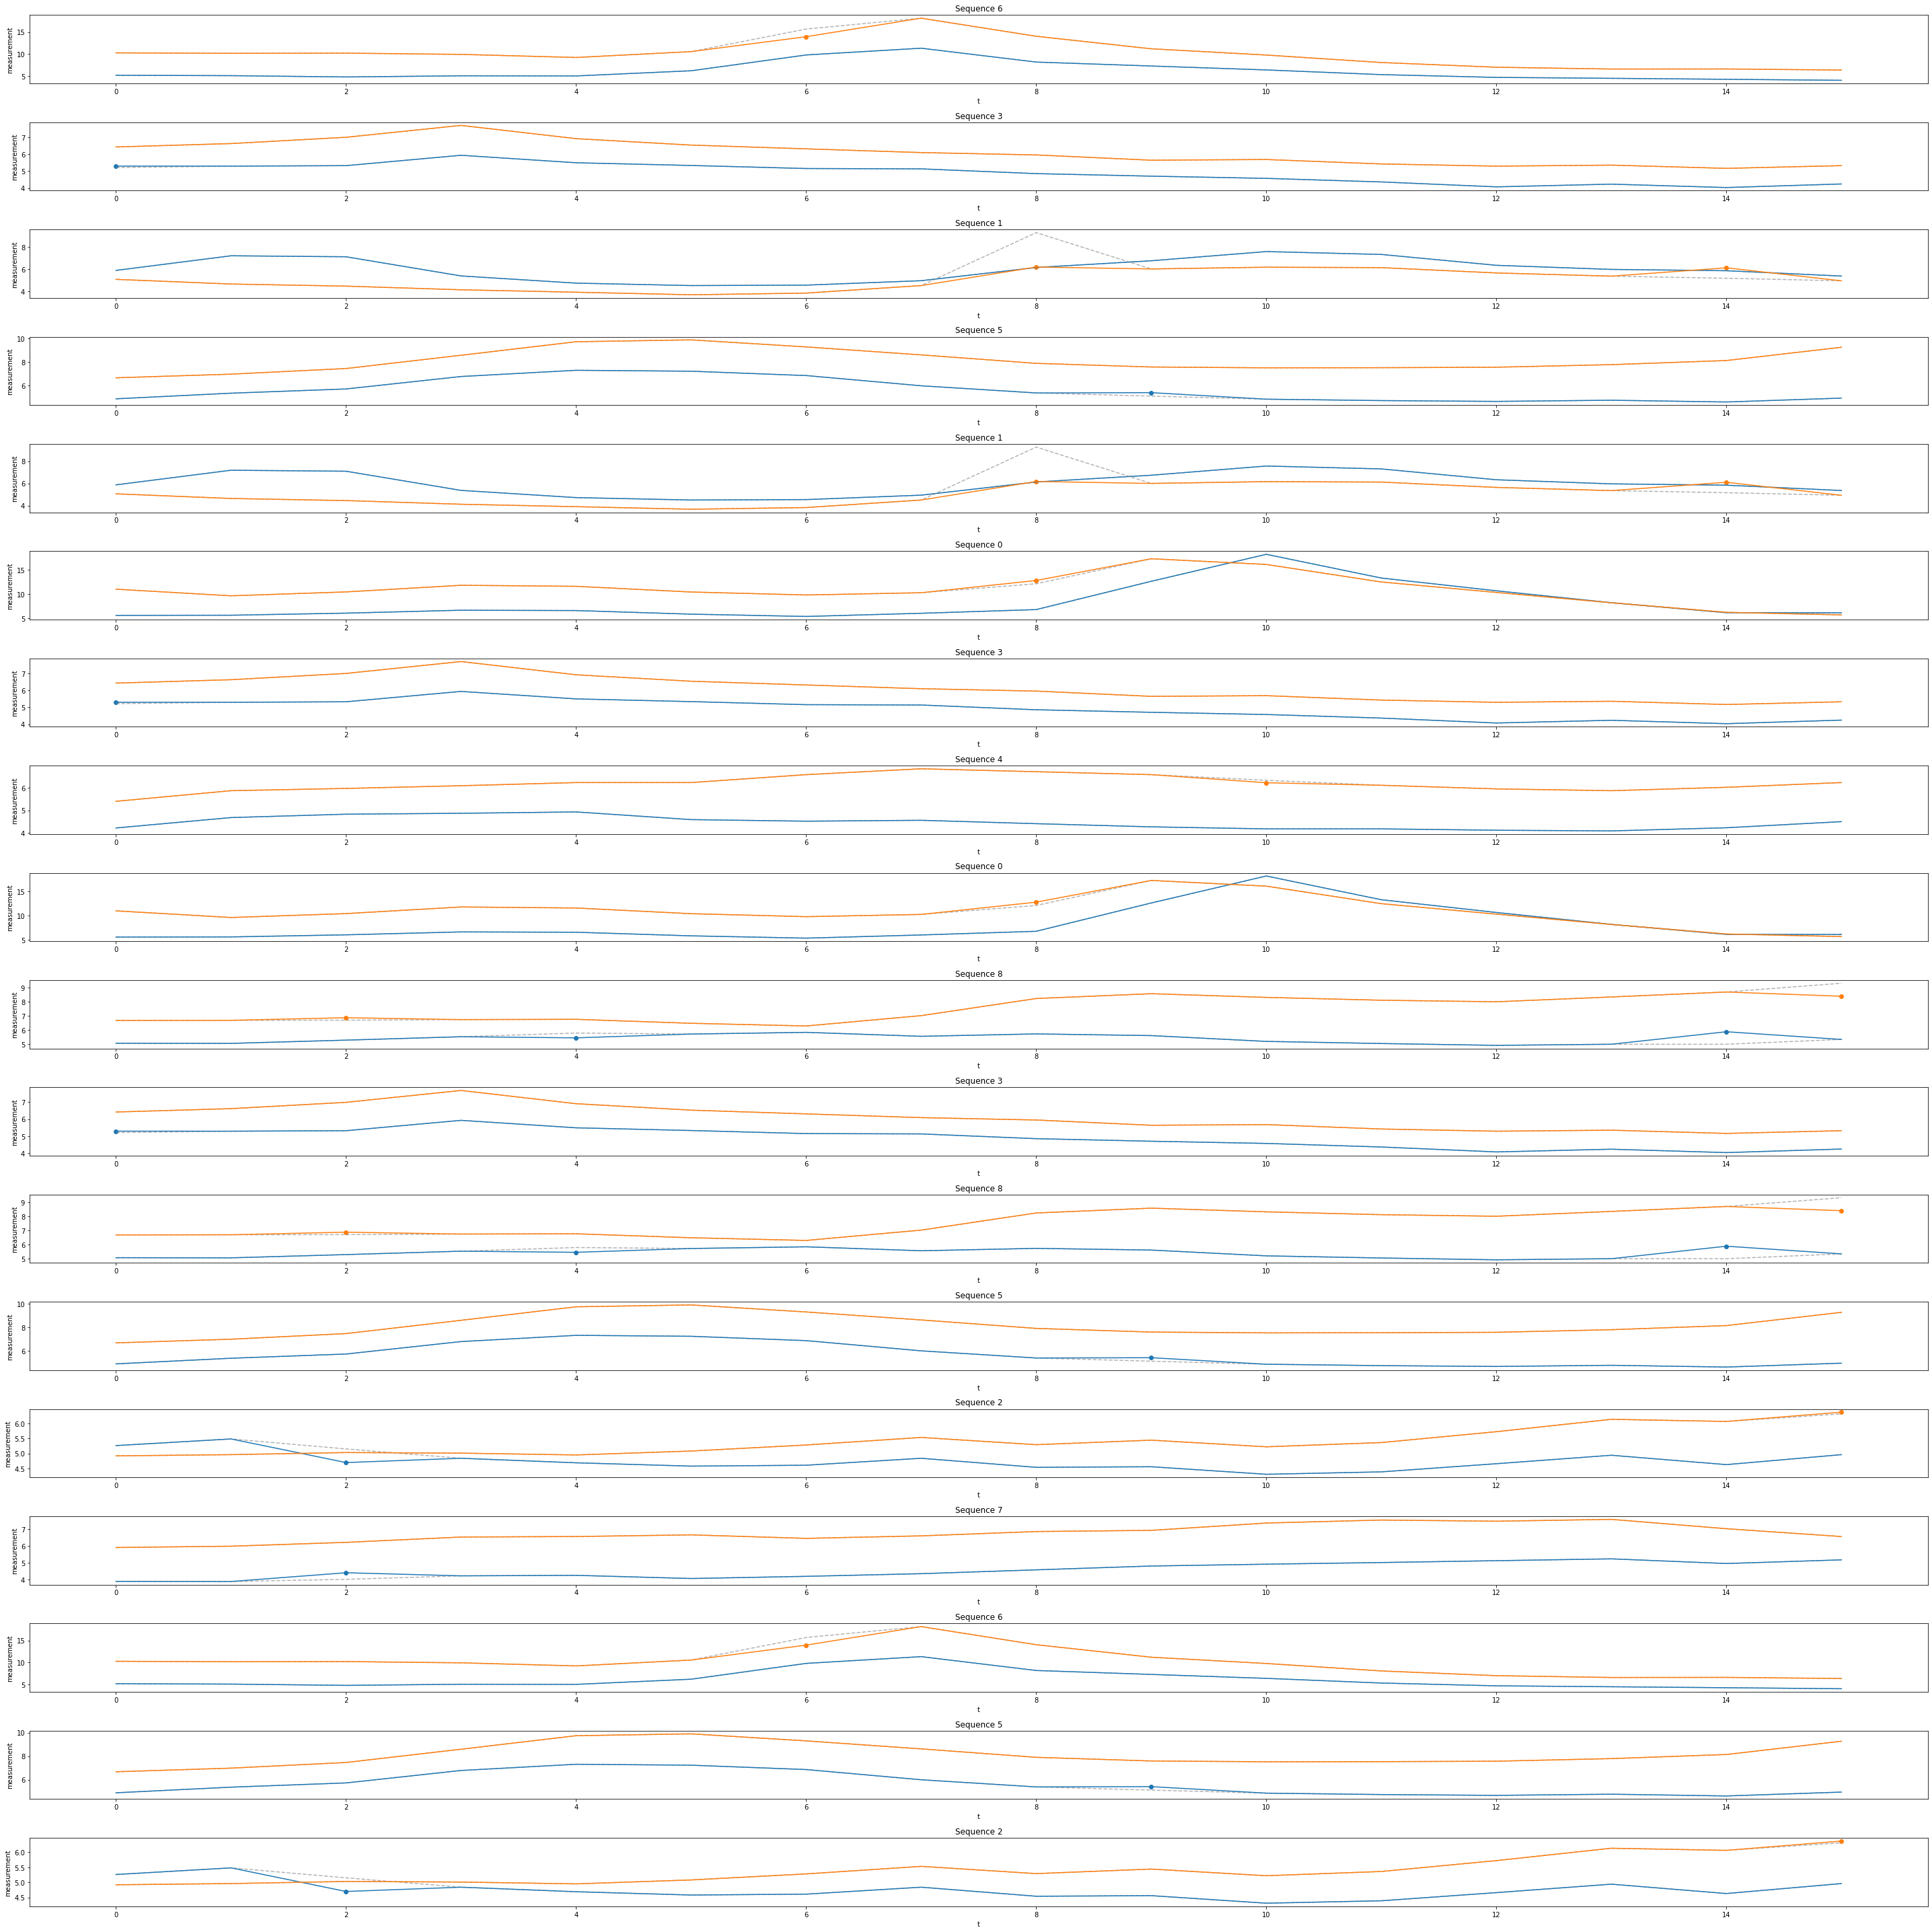

In [74]:
plt.figure(figsize=(40,40))
for row in range(18):
    randidx = np.random.randint(0,rec.shape[0])
    
    plt.subplot(18,1,(row+1))
    plt.title("Sequence {}".format(randidx))
    plt.xlabel("t")
    plt.ylabel("measurement")
    missing = (mask[randidx]==0).cpu()
    for dim in range(2):
        plt.plot(np.arange(16),ground_truth[randidx,dim,:].cpu(),linestyle="dashed",c="grey",alpha=0.6)
        plt.plot(np.arange(16),rec[randidx,dim,:].cpu())
        plt.scatter(np.arange(16)[missing[dim]],rec[randidx,dim,:][missing[dim]].cpu())
plt.tight_layout()

In [76]:
# # Specify a path
PATH = F"/content/drive/My Drive/COVID - Trends Data/georgia_state_model.pt"

# # Save
torch.save(georgia_model.state_dict(), PATH)